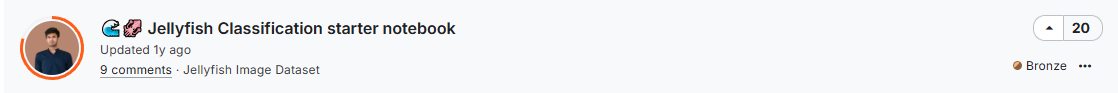

In [3]:
import os
import cv2
import numpy as np
from IPython.display import display, Image
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split
#from tensorflow.keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50, DenseNet121, EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split


In [7]:
# Define the path to the dataset folders
foloder_path = r"D:\code_study\ML_CODE\dataSets\Jellyfish_Image_Dataset\archive"
foloder_path = foloder_path.replace("\\", "/")

Moon_jellyfish_folder = foloder_path + "/Moon_jellyfish"
barrel_jellyfish_folder = foloder_path + "/barrel_jellyfish"
blue_jellyfish_folder = foloder_path + "/blue_jellyfish"
compass_jellyfish_folder = foloder_path + "/compass_jellyfish"
lions_mane_jellyfish_folder = foloder_path + "/lions_mane_jellyfish"
mauve_stinger_jellyfish_folder = foloder_path + "/mauve_stinger_jellyfish"


# Function to load and preprocess images
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (224, 224))  # Resize to a fixed size for the model
            images.append(img)
    return images

# Moon_jellyfish_folder = "/kaggle/input/jellyfish-types/Moon_jellyfish"
# barrel_jellyfish_folder = "/kaggle/input/jellyfish-types/barrel_jellyfish"
# blue_jellyfish_folder = "/kaggle/input/jellyfish-types/blue_jellyfish"
# compass_jellyfish_folder = "/kaggle/input/jellyfish-types/compass_jellyfish"
# lions_mane_jellyfish_folder = "/kaggle/input/jellyfish-types/lions_mane_jellyfish"
# mauve_stinger_jellyfish_folder = "/kaggle/input/jellyfish-types/mauve_stinger_jellyfish"

# Load images and labels for each emotion
Moon_images = load_images_from_folder(Moon_jellyfish_folder)
barrel_images = load_images_from_folder(barrel_jellyfish_folder)
blue_images = load_images_from_folder(blue_jellyfish_folder)
compass_images = load_images_from_folder(compass_jellyfish_folder)
lions_mane_images = load_images_from_folder(lions_mane_jellyfish_folder)
mauve_stinger_images = load_images_from_folder(mauve_stinger_jellyfish_folder)


# Create labels for each emotion category
Moon_labels = [0] * len(Moon_images)
barrel_labels = [1] * len(barrel_images)
blue_labels = [2] * len(blue_images)
compass_labels = [3] * len(compass_images)
lions_mane_labels = [4] * len(lions_mane_images)
mauve_stinger_labels = [5] * len(mauve_stinger_images)

all_labels = Moon_labels+barrel_labels+blue_labels+compass_labels+lions_mane_labels+mauve_stinger_labels 

In [8]:
print('Moon_jellyfish_images: ',len(Moon_images))
print('barrel_jellyfish_images: ',len(barrel_images))
print('blue_jellyfish_images: ',len(blue_images))
print('compass_jellyfish_images: ',len(compass_images))
print('lions_mane_jellyfish_images: ',len(lions_mane_images))
print('mauve_stinger_jellyfish_images: ',len(mauve_stinger_images))

Moon_jellyfish_images:  150
barrel_jellyfish_images:  150
blue_jellyfish_images:  150
compass_jellyfish_images:  150
lions_mane_jellyfish_images:  150
mauve_stinger_jellyfish_images:  150


c:\Users\Leaper\anaconda3\envs\tensorflow\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


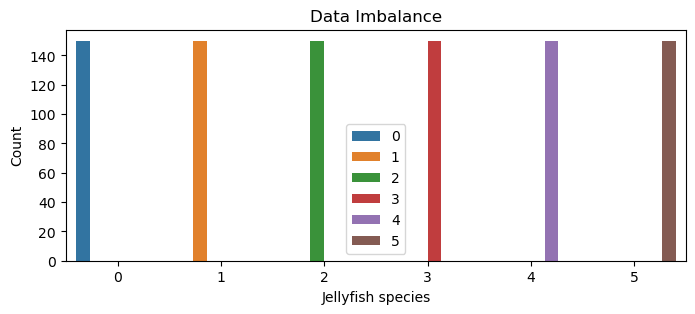

In [9]:
# Data Imbalance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 3))
sns.countplot(x=all_labels, hue=all_labels)
plt.title('Data Imbalance')
plt.xlabel('Jellyfish species')
plt.ylabel('Count')
plt.show()

In [12]:
# Concatenate images and labels
X = np.array(Moon_images + barrel_images + blue_images + compass_images + lions_mane_images + mauve_stinger_images)
y = np.array(Moon_labels + barrel_labels + blue_labels + compass_labels + lions_mane_labels + mauve_stinger_labels)

# Normalize pixel values to range [0, 1]
X = X.astype('float32') / 255.0

# One-hot encode the labels
y = to_categorical(y, 6)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [13]:
input_shape_resnet = (224, 224, 3)
input_shape_densenet = (224, 224, 3)
input_shape_efficientnet = (224, 224, 3)

def resize_images(images, input_shape):
    resized_images = []
    for img in images:
        img_resized = cv2.resize(img, (input_shape[0], input_shape[1]))
        img_resized = np.expand_dims(img_resized, axis=-1)
        img_resized = np.repeat(img_resized, 3, axis=-1)  # Add three channels to convert grayscale to RGB
        resized_images.append(img_resized)
    return np.array(resized_images)

X_train_resized_resnet = resize_images(X_train, input_shape_resnet)

In [14]:
X_train_resized_densenet = resize_images(X_train, input_shape_densenet)

In [15]:
X_train_resized_efficientnet = resize_images(X_train, input_shape_efficientnet)

In [ ]:
# Load pre-trained ResNet50 model and remove the top classification layer
resnet_base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape_resnet)
resnet_base_model.trainable = False

# Add custom classification head to the ResNet model
resnet_global_avg_pooling = GlobalAveragePooling2D()(resnet_base_model.output)
resnet_output = Dense(6, activation='softmax')(resnet_global_avg_pooling)
resnet_model = Model(inputs=resnet_base_model.input, outputs=resnet_output)

# Compile the ResNet model
resnet_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


densenet_base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape_densenet)
densenet_base_model.trainable = False


densenet_global_avg_pooling = GlobalAveragePooling2D()(densenet_base_model.output)
densenet_output = Dense(6, activation='softmax')(densenet_global_avg_pooling)
densenet_model = Model(inputs=densenet_base_model.input, outputs=densenet_output)


densenet_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=10, factor=0.5, min_lr=1e-7)

# Train the models
'''
train the models on resized training data and validation split,
monitoring the validation loss and using the
early stopping and learning rate scheduling callbacks to stop when necessary.
'''

resnet_history = resnet_model.fit(X_train_resized_resnet, y_train, batch_size=32, epochs=200, validation_split=0.2,callbacks=[early_stopping, lr_scheduler])
densenet_history = densenet_model.fit(X_train_resized_densenet, y_train, batch_size=32, epochs=200, validation_split=0.2,callbacks=[early_stopping, lr_scheduler])

94773248/94765736 [==============================] - 18s 0us/step
Epoch 1/200
18/18 [==============================] - 7s 178ms/step - loss: 1.9701 - accuracy: 0.1344 - val_loss: 1.9141 - val_accuracy: 0.1528
Epoch 2/200
18/18 [==============================] - 2s 119ms/step - loss: 1.7908 - accuracy: 0.1943 - val_loss: 1.7691 - val_accuracy: 0.2083
Epoch 3/200
18/18 [==============================] - 2s 118ms/step - loss: 1.7867 - accuracy: 0.1713 - val_loss: 1.8030 - val_accuracy: 0.2083
Epoch 4/200
18/18 [==============================] - 2s 120ms/step - loss: 1.7865 - accuracy: 0.1681 - val_loss: 1.7770 - val_accuracy: 0.2292
Epoch 5/200
18/18 [==============================] - 2s 117ms/step - loss: 1.7741 - accuracy: 0.2041 - val_loss: 1.7883 - val_accuracy: 0.1319
Epoch 6/200
18/18 [==============================] - 2s 117ms/step - loss: 1.7606 - accuracy: 0.1878 - val_loss: 1.7727 - val_accuracy: 0.2569
Epoch 7/200
18/18 [==============================] - 2s 118ms/step - loss: 1

In [ ]:
# Resize test images to the input shape required by each model
X_test_resized_densenet = resize_images(X_test, input_shape_densenet)
X_test_resized_resnet = resize_images(X_test, input_shape_resnet)

# Evaluate the models on test data
densenet_loss, densenet_accuracy = densenet_model.evaluate(X_test_resized_densenet, y_test)
resnet_loss, resnet_accuracy = resnet_model.evaluate(X_test_resized_resnet, y_test)

print("\n")
print("DenseNet Test accuracy:", densenet_accuracy)
print("ResNet Test accuracy:", resnet_accuracy)

In [ ]:
import matplotlib.pyplot as plt


def plot_learning_curves(history, model_name, ax):
    ax.plot(history.history['loss'], label='Training Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.set_title(f'{model_name} Learning Curve')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.legend()


def plot_accuracy_curves(history, model_name, ax):
    ax.plot(history.history['accuracy'], label='Training Accuracy')
    ax.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax.set_title(f'{model_name} Accuracy Curve')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    ax.legend()


fig, axs = plt.subplots(2, 2, figsize=(20, 15))
plot_learning_curves(densenet_history, 'DenseNet', axs[0, 0])
plot_accuracy_curves(densenet_history, 'DenseNet', axs[0, 1])

plot_learning_curves(resnet_history, 'ResNet', axs[1, 0])
plot_accuracy_curves(resnet_history, 'ResNet', axs[1, 1])


plt.tight_layout()
plt.show()
